In [2]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [3]:
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples = 1000, n_features=NUM_FEATURES, centers=NUM_CLASSES, random_state=RANDOM_SEED)
X_train, X_test, y_train, y_test = train_test_split(X_blob, y_blob, test_size=0.2)

X_blob.shape

(1000, 2)

In [4]:
# turning data into tensors
X_train = torch.from_numpy(X_train).type(torch.float)
X_test = torch.from_numpy(X_test).type(torch.float)
y_train = torch.from_numpy(y_train).type(torch.LongTensor)
y_test = torch.from_numpy(y_test).type(torch.LongTensor)

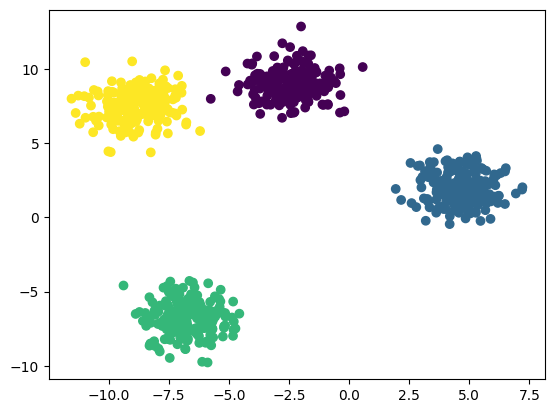

In [5]:
#plot the figures
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [7]:
from torch import nn

class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layers_stack = nn.Sequential(
            nn.Linear(input_features, hidden_units),
            nn.Linear(hidden_units, hidden_units),
            nn.Linear(hidden_units, output_features))
    def forward(self, x):
        return self.linear_layers_stack(x)

In [8]:
# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layers_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [9]:
lossFn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(), lr=0.1)

In [10]:
model_4(X_test.to(device))[:5]

tensor([[-0.3857, -2.1368,  0.4014, -0.4448],
        [ 0.2184, -0.0119,  1.1351, -0.2127],
        [ 0.3230,  0.1070,  1.3802, -0.1908],
        [ 0.1552, -0.0374,  0.9653, -0.2225],
        [ 0.2936,  0.2744,  1.2162, -0.1822]], grad_fn=<SliceBackward0>)

In [16]:
y_logits = model_4(X_test.to(device))
y_pred = torch.softmax(y_logits, dim=1)
y_pred[:5].shape

torch.Size([5, 4])

In [17]:
y_pred[:5].argmax(dim = 1)

tensor([2, 2, 2, 2, 2])